## Exercise 10: Random Networks


In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

### Task 1: Erdos-Renyi Graphs

#### a) Implementing Erdos-Renyi Graphs
Implement the Erdos-Renyi Random graph model, using the signature in the cell below.

In [2]:
# n: number of nodes
# p: edge probability in [0,1]
# return a networkx graph
def er_graph(n,p):
    Gr=nx.Graph()
    Gr.add_nodes_from(range(n)) 
    for i in range(n):
        for j in range(i+1,n):
            if (np.random.rand() < p):
                Gr.add_edge(i,j) #
    return Gr

#### b) Diameter

Use your implementation to create a random graph with 1000 nodes and average degree 10. What is the diameter of the resulting network? Do you oberve the small-world effect?

In [94]:
G = er_graph(1000,10/999)
print(nx.info(G))
print(nx.diameter(G))

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 4899
Average degree:   9.7980
5


__Answer__: We clearly observe the small-world effect, as in this graph with 1000 nodes, every pair of nodes only has a maximum distance of 5 to each other. 

#### c) Degree Distribution

Make use of histograms to plot the degree distribution of the network from b).
After that, draw 1000 times from a poisson distribution and plot the histogram of outcomes. Are the resulting plots similar?

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


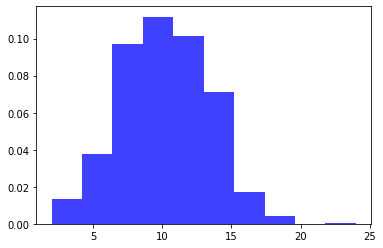

In [6]:
G1000 = er_graph(1000,p=10/999)
degree1000 = list(dict(nx.degree(G1000)).values())
n, bins, patches= plt.hist(degree1000, normed=True, facecolor='blue', alpha=0.75);

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([0.03238095, 0.06952381, 0.11333333, 0.10666667, 0.08428571,
        0.04190476, 0.01952381, 0.00714286, 0.00095238, 0.00047619]),
 array([ 3. ,  5.1,  7.2,  9.3, 11.4, 13.5, 15.6, 17.7, 19.8, 21.9, 24. ]),
 <a list of 10 Patch objects>)

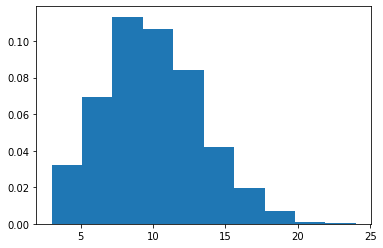

In [7]:
plt.hist(np.random.poisson(10,1000),normed=True)

#### d) Emergence of a Giant Component

Use the random graph generator from NetworkX to create 100 random graphs with 300 nodes and average degrees linearly increaing from $c = 0.1$ to $c = 4$.
Using these graphs, plot the share of nodes in the largest connected component (on the y-axis) as a function of the average degree (on the x-axis).
At what average degree do you observe the emergence of a giant component?

In [8]:
degrees = np.linspace(0.1,4,100)
graphs = dict([(i,nx.erdos_renyi_graph(300,degrees[i]/299)) for i in range(100)])

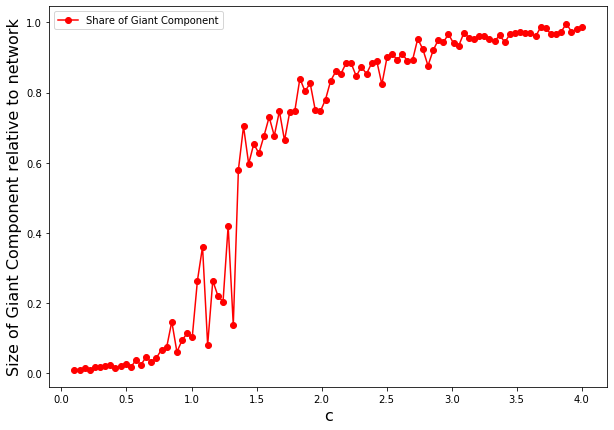

In [102]:
import matplotlib.pyplot as plt
shares = [sorted([len(x) for x in nx.connected_components(G)],reverse=True)[0]/300 for G in graphs.values()]

fig = plt.figure(figsize=(10,7))
plt.plot(np.linspace(0.1,4,100), shares, '-o',color='red',label='Share of Giant Component')
plt.xscale('linear')
plt.xlabel('c', fontsize=16)
plt.ylabel('Size of Giant Component relative to network', fontsize=16)
#sns.despine()

plt.legend()
plt.show()

__Answer:__ The emergence starts around c=1.

### Task 2: The Barabasi-Albert Model


####  a) Implementing Preferential Attachment
Write your own implementation of the Barabasi-Albert (BA) model, using the signature in the cell below. As an initial condition, start with a network with $m$ nodes and no edges.

In [73]:
import random

# n: number of nodes
# m: number of edges per incoming node
# return a networkx graph
def ba_graph(n,m):
    G = nx.empty_graph(m)
    sample_list = list(range(m))
    
    for k in range(m,n):
        nodes = random.sample(sample_list,m)
        
        # note that this may yield multiedges
        G.add_edges_from(zip([k]*m,nodes))
        sample_list += (nodes + [k]*m)
    
    return G

#### b) Basic Statistics
Using your implementation, create a BA network with 1000 nodes, and number of edges per joining node (m) = 4. What is the average, minimum and maximum degree of the network? What is its diameter?

In [31]:
G = ba_graph(1000,4)

In [33]:
print(nx.info(G))
BA_degrees = dict(nx.degree(G)).values()
print(max(BA_degrees),min(BA_degrees))

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 3984
Average degree:   7.9680
86 4


#### c) Local Clustering
For all integer values of $m$ between 5 and 30 create a barabasi-Albert graph with 300 nodes and $m$ edges per incoming node. Further, for each value $m$, create an Erdos-Renyi graph with (roughly) the same degree as the corresponding Barabasi-Albert graph.  Plot the average local clustering coefficient per network type against the average degree. What do you observe?

In [99]:
M_space = list(np.arange(5,30))
ba_graphs = dict([(m,ba_graph(300, m)) for m in M_space])
ba_dgs = [2*nx.number_of_edges(ba_graphs[m])/300/299 for m in M_space]
er_graphs = dict([(m,er_graph(300, 2*nx.number_of_edges(ba_graphs[m])/300/299)) for m in M_space])
er_dgs = [2*nx.number_of_edges(er_graphs[m])/300/299 for m in M_space]

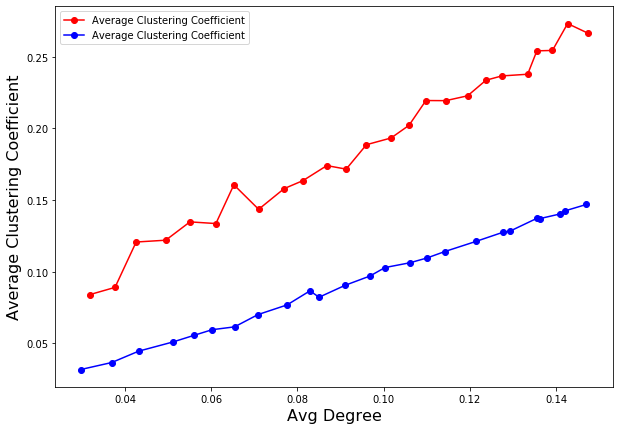

In [101]:
ba_accs = [nx.average_clustering(ba_graphs[m]) for m in M_space]
er_accs = [nx.average_clustering(er_graphs[m]) for m in M_space]

fig = plt.figure(figsize=(10,7))
plt.plot(ba_dgs, ba_accs, '-o',color='red',label='Average Clustering Coefficient')
plt.plot(er_dgs, er_accs, '-o',color='blue',label='Average Clustering Coefficient')
plt.xscale('linear')
plt.xlabel('Avg Degree', fontsize=16)
plt.ylabel('Average Clustering Coefficient', fontsize=16)
plt.legend()
plt.show()

__Answer__: We observe that BA graphs are always significantly more clustered than ER graphs of the same degrees.

#### d) Degree Distribution
Use your implementation to plot the degree distributions of a BA model with 1000 nodes and m=5. Create a _linear_ and a _log-log_ plot of the degree distribution, where y represents the share of nodes in the graph of a degree x. Do you observe a power-law degree distribution?

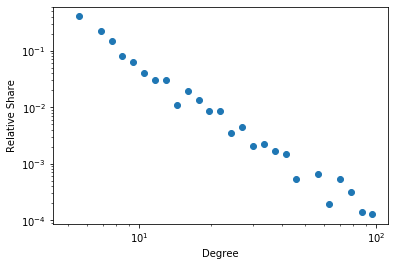

In [40]:
G = ba_graph(1000, 5)
degrees = list(dict(G.degree).values())

bin_edges = np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), num=30)
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig02 = plt.figure()
plt.loglog(bin_edges[:-1], density, marker='o', linestyle='none')

plt.xlabel("Degree")
plt.ylabel("Relative Share")
plt.show()

48 48


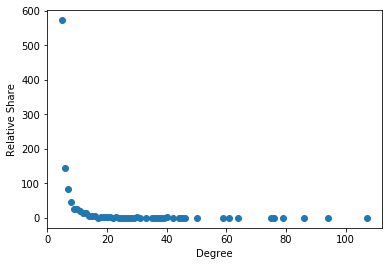

In [57]:
hist = np.histogram(degrees, bins = len(set(degrees)))[0]
d = np.unique(degrees)
print(len(hist),len(d))
plt.scatter(d, hist, marker='o')

plt.xlabel("Degree")
plt.ylabel("Relative Share")
plt.show()

__Answer:__ We indeed observe a power-law degree distribution.